# Medidas de tendencia central en Python

# Medidas de tendencia central

#### Media 
$$\overline X =\frac{\{x_1,x_2,....X_n\}}{N}=\frac{1}{N}\sum_{i=1}^N X_i$$

#### Mediana(impar) 
$$\large{X_{\left[{\frac{N+1}{2}}\right]}}$$

#### Mediana(par) 
$$\large{\frac{X_{\left[ \frac{N}{2}\right]} + X_{\left[\frac{N}{2}+1\right] }}{2}}$$

#### Moda  
$$\LARGE{x_k} $$ 
donde $\text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [1]:
#Importando librerías y el dataset
import pandas as pd

In [2]:
df_cars=pd.read_csv('dataset/cars.csv')
df_cars.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151


Tenemos que implementar los estadísticos descriptivos que hemos visto, para tener una información completa del data set

In [3]:
df_cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [4]:
#Aplicando estadísticos específicos por columna
#Promedio o Media
df_cars['price_usd'].mean()

6639.971021255613

El resultado anterior quiere decir que en promedio los autos tienen un precio de **$6639.97 dls** en ese catalogo o dataset de autos usados. 

Pero eso no me dice nada, yo quisiera saber. 
- Cual es el auto mas barato
- Cual es el auto mas costoso
- Qué tanto sesgo hay por valores atípicos.
  - > Es decir que tanto es que los autos aunque estén usados tienen un valor elevado

In [5]:
#verifiquemos el valor de la Mediana con median
df_cars['price_usd'].median()

4800.0

## Explicación
De acuerdo a lo visto tenemos que:
- $media = \$6639.97 $
- $mediana = \$4800.00 $
  
Con esto vemos que los 2 valores difieren como en el caso del Ejemplo Bill Gates. Podemos intuir que pueden existir valores atípicos, es decir; pueden existir autos que estén muy costosos y hace que el $promedio$ o la $media$ > $mediana$, con lo que podemos decir que la $media$ esté mucho más a la derecha respecto de la $mediana$, haciendo parecer que los autos usados son costosos o que el promedio de un auto usado es elevado.

## Diagrama de frecuencia vs Histograma
### Diagrama de frecuencia 
Cuando nosotros hablamos del diagrama de frecuencia utilizamos datos numéricos discretos como en el caso de la **Edad**, contamos personas que tengan cierta edad y eso lo graficamos en una **gráfica de barras**.
Explicado de otro modo yo asigno una barra para cada tipo de ocurrencia de los datos, entonces una barra para los que tienen 15 años, otra barra para los que tienen 18 años y así sucesivamente. 

### Histograma
Para este caso en el que tenemos datos continuos numéricos como parámetro **Precio** hacemos uso de algo similar pero que está dedicado para tipos de datos continuos, lo graficamos en algo que llamamos **histograma**, así que el histograma es la misma idea de un diagrama de barras pero cada barra no corresponde a un valor único sino a un **rango de valores**. Ahora vamos a agrupar en rangos de valores $\$0-100,\$100-200,\$200-300,...$ y así sucesivamente, por ejemplo. Entonces cada barra va a contar las ocurrencias de los autos que tienen un precio entre $0 y $100, etc. Eso es el histograma; una generalización del concepto de diagrama de frecuencias. 

<Axes: ylabel='Frequency'>

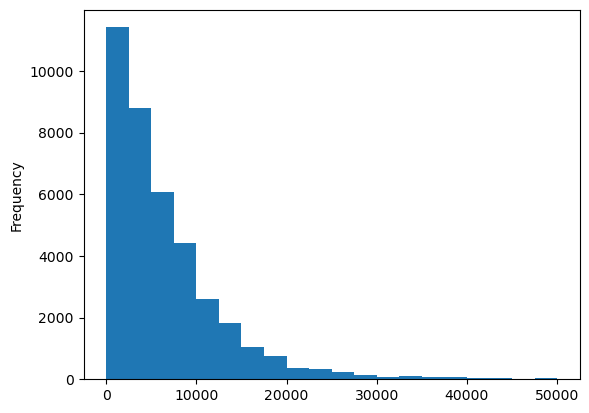

In [6]:
#¿cómo hacemos la agrupación de los valores
#Con bins hacemos la segmentación de valores
#Para que los acomode en rangos
df_cars['price_usd'].plot.hist(bins=20)

Como podemos ver, el eje $Y$ se llama frecuencia, que es el numero de ocurrencias de ciertos valores.     
A simple vista podemos ver que la concentración de valores esta entre $0 a $10,000. También podemos ver el caso de valores atípicos en el extremo derecho que están en un rango de $30,000 $40,00 a $50,000. Aunque son usados tienen esos valores.

Con ello podemos decir, aunque son autos usados hay un sesgo en los datos del conjunto y se debe a que estamos metiendo autos de todas las marcas, de todos los años, entonces es muy diversa la información.

Con esto podemos analizar de manera más profunda ciertas datos de un dataset con medidas estadísticas.

In [7]:
import seaborn as sns

In [8]:
#viendo las columnas que tengo
for index,column in enumerate(df_cars.columns):
    print(f'Nombre de columna [{index}] = {column}')


Nombre de columna [0] = manufacturer_name
Nombre de columna [1] = model_name
Nombre de columna [2] = transmission
Nombre de columna [3] = color
Nombre de columna [4] = odometer_value
Nombre de columna [5] = year_produced
Nombre de columna [6] = engine_fuel
Nombre de columna [7] = engine_has_gas
Nombre de columna [8] = engine_type
Nombre de columna [9] = engine_capacity
Nombre de columna [10] = body_type
Nombre de columna [11] = has_warranty
Nombre de columna [12] = state
Nombre de columna [13] = drivetrain
Nombre de columna [14] = price_usd
Nombre de columna [15] = is_exchangeable
Nombre de columna [16] = location_region
Nombre de columna [17] = number_of_photos
Nombre de columna [18] = up_counter
Nombre de columna [19] = feature_0
Nombre de columna [20] = feature_1
Nombre de columna [21] = feature_2
Nombre de columna [22] = feature_3
Nombre de columna [23] = feature_4
Nombre de columna [24] = feature_5
Nombre de columna [25] = feature_6
Nombre de columna [26] = feature_7
Nombre de col

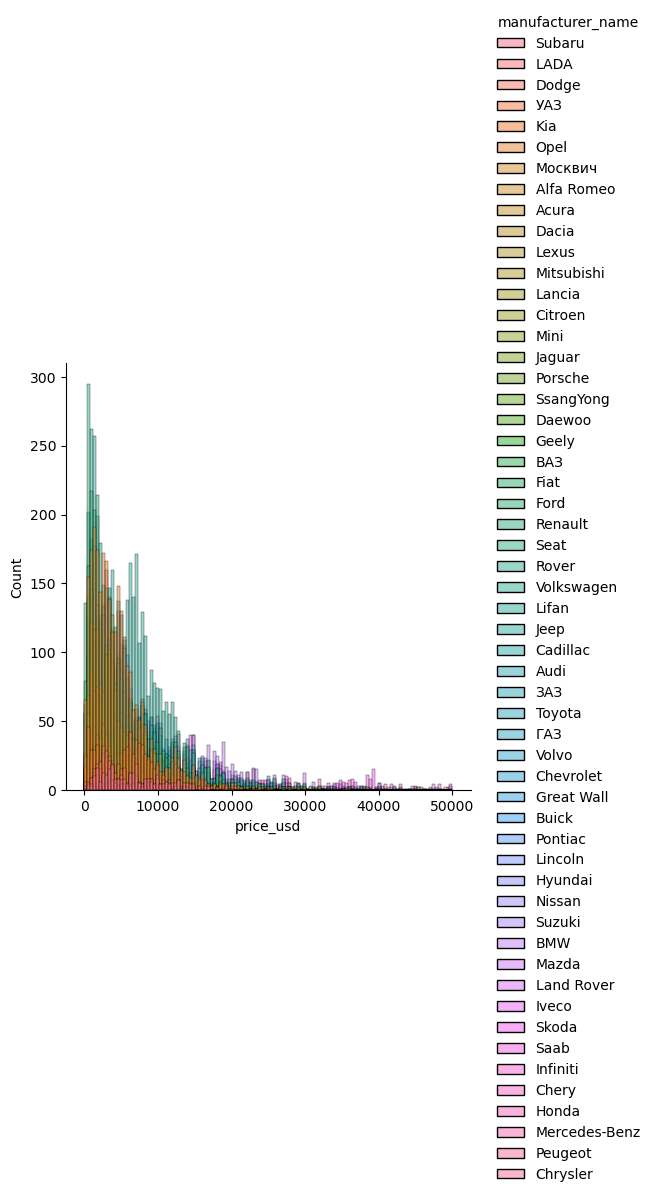

In [9]:
#Usando Displot [Distribution Plot]
#Realizando segmentación con hue
sns.displot(df_cars,x='price_usd',hue='manufacturer_name')


El caso anterior pierde un poco el propósito que es resumir información, porque la gráfica está muy sobrecargada. Hay demasiadas categorías.

Lo mejor seria escoger otro tipo de segmentación, escogeremos una basada en el tipo de motor.  

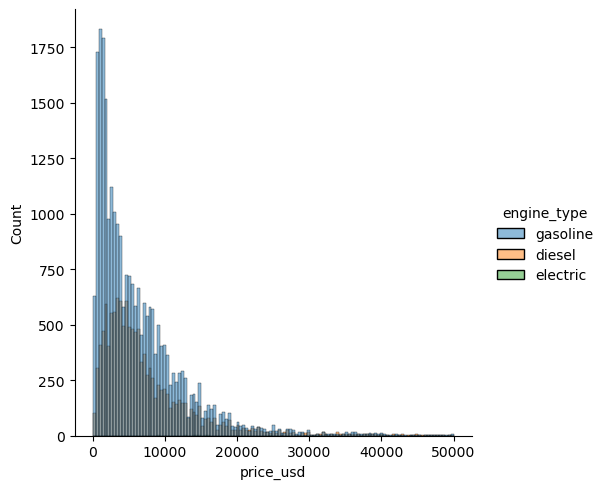

In [10]:
#Usando Displot [Distribution Plot]
#Realizando segmentación con hue
sns.displot(df_cars,x='price_usd',hue='engine_type')

Como se puede observar, las barras están superpuestas y es difícil visualizar los datos. Buscaremos barras apiladas o en **stack**, ¿cómo lo hacemos? con el argumento de la función `multiple=stack`

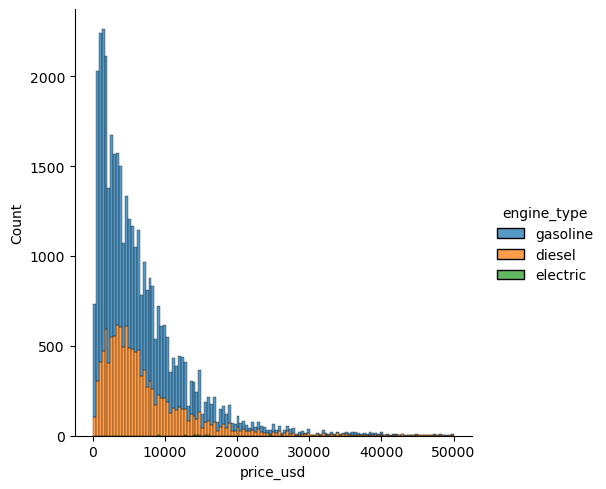

In [11]:
#Usando Displot [Distribution Plot]
#Realizando segmentación con hue
sns.displot(df_cars,x='price_usd',hue='engine_type',multiple='stack')

Recordemos que realizar el conteo de algo, también es un estadístico.

In [12]:
# Haciendo conteo de agrupación de datos
# Es decir quiero saber cuantos autos 
# existen con el parámetro 'engine_type' y que sean 'electric' 

# Usamos groupby

df_cars.groupby('engine_type').count()
# La variable tiene que ser una variable categórica

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


Veamos que el número de autos eléctricos son tan solo 10, comparados  contra 12mil y 25 mil, es una cantidad muy pequeña, por eso que no se ven reflejados en la gráfica de histograma.

Algo importante, es que la estadística descriptiva no son solo números, también son visualizaciones y se va a dividir en 2 ramas fundamentales:
- La que tiene que ver con esos valores analíticos; promedio, mediana (números concretos)
- Visualizaciones

Como se puede observar, haciendo uso del groupby podemos calcular otros parámetros estadísticos

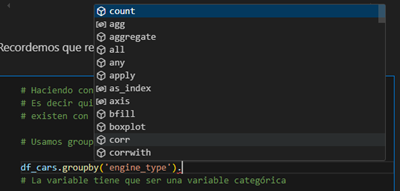

### ¿Cómo nos podemos enfocar en algo de interés?
Yo como usuario quiero comprar y comparar una marca que a mi me gusta mucho, me gustan mucho los autos Audi. Quiero hacer una descripción sencilla.

In [13]:
df_audiQ7=df_cars[(df_cars['manufacturer_name']=='Audi')&(df_cars['model_name']=='Q7')]
df_audiQ7.head(7)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45
19660,Audi,Q7,automatic,grey,187000,2016,gasoline,False,gasoline,3.0,...,False,False,False,True,False,False,False,False,False,2
19680,Audi,Q7,automatic,black,170000,2007,gasoline,False,gasoline,3.6,...,True,True,False,True,True,False,False,True,True,129


<Axes: xlabel='price_usd', ylabel='Count'>

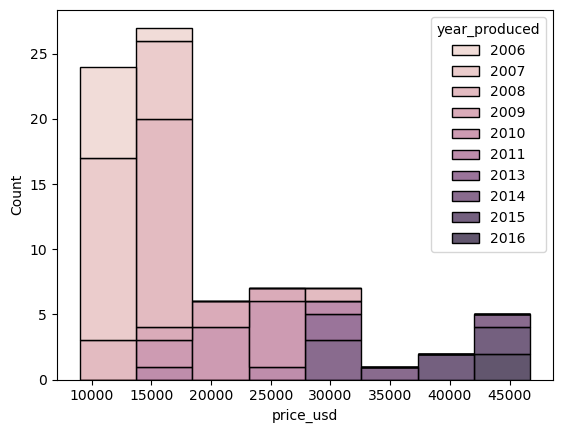

In [14]:
# Haciendo histograma con Seaborn

sns.histplot(df_audiQ7,x='price_usd',hue='year_produced',multiple='stack')

Por ultimo para cerrar, veamos que la concentración de autos ronda en valores de entre 10,000 a 20,000 USD y son autos con modelos entre 2006 a 2010. Que son los autos mas antiguos.

Por otro lado vemos que los autos más caros y que rondan entre 40,000 a 50,000 son los que tienen un modelo entre 2014 a 2016, además que hay menos en este set de datos.

Todo esto lo podemos ver sin la necesidad de explorar los registros completos de **AUDI - Q7**

Para completar un análisis estadístico descriptivo, necesitamos y tenemos que tener en cuenta otro tipo de medidas que son las de dispersión y eso es lo que se verá en la proxima clase.

## Reto 
Realizar un análisis similar con una marca y un auto de tu agrado

In [15]:
# Explorando las marcas de carros
df_cars['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

In [16]:
# Explorando la marca Suzuki para ver los modelos
df_Suzuki=df_cars[df_cars['manufacturer_name']=='Suzuki']
df_Suzuki['model_name'].unique()

array(['Liana', 'Grand Vitara', 'SX4', 'Baleno', 'Wagon R', 'Swift',
       'Splash', 'XL7', 'Vitara', 'SX4 S-Cross', 'Alto', 'Forenza',
       'Verona', 'Samurai', 'Ignis', 'Jimny', 'Aerio'], dtype=object)

In [17]:
# Escojo a XL7
# Declararé nuevamente el dataframe
df_Suzuki=df_cars[(df_cars['manufacturer_name']=='Suzuki')&(df_cars['model_name']=='XL7')]
df_Suzuki

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
27294,Suzuki,XL7,automatic,silver,273588,2002,gasoline,False,gasoline,2.7,...,True,False,True,True,False,False,False,True,True,71
27355,Suzuki,XL7,automatic,brown,22000,2007,gas,True,gasoline,3.6,...,True,True,True,False,True,True,True,True,True,28
27476,Suzuki,XL7,automatic,silver,300000,2007,gasoline,False,gasoline,3.6,...,True,True,False,True,True,False,False,True,True,70
27493,Suzuki,XL7,mechanical,silver,240000,2004,diesel,False,diesel,2.0,...,True,False,False,False,True,False,False,False,True,169


Al parecer no fue buena opción porque no hay muchos. Intentaré buscar los que tengan más registros.


In [18]:
df_Suzuki=df_cars[df_cars['manufacturer_name']=='Suzuki']
df_Suzuki.groupby('model_name').count()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
model_name,,,,,,,,,,,,,,,,,,,,,
Aerio,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alto,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Baleno,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Forenza,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Grand Vitara,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
Ignis,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Jimny,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Liana,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
SX4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [19]:
# Escogeré Grand Vitara
# Declararé nuevamente el dataframe
df_Suzuki=df_cars[(df_cars['manufacturer_name']=='Suzuki')&(df_cars['model_name']=='Grand Vitara')]
df_Suzuki


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
27267,Suzuki,Grand Vitara,automatic,black,169000,2010,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,1
27270,Suzuki,Grand Vitara,automatic,blue,102000,2011,gasoline,False,gasoline,2.4,...,False,False,True,False,True,True,True,True,True,26
27273,Suzuki,Grand Vitara,automatic,black,150000,2013,gasoline,False,gasoline,2.4,...,True,False,False,True,True,True,True,True,True,26
27274,Suzuki,Grand Vitara,automatic,other,132000,2008,gasoline,False,gasoline,2.4,...,True,False,False,False,True,False,False,True,True,78
27276,Suzuki,Grand Vitara,automatic,black,157000,2010,gasoline,False,gasoline,2.4,...,True,True,False,True,True,True,True,True,True,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27485,Suzuki,Grand Vitara,mechanical,silver,260000,2006,diesel,False,diesel,1.9,...,False,False,False,False,True,False,True,False,True,90
27490,Suzuki,Grand Vitara,automatic,black,157000,2011,gasoline,False,gasoline,2.4,...,True,True,True,False,False,True,True,True,True,152
27492,Suzuki,Grand Vitara,mechanical,blue,111000,2007,gasoline,False,gasoline,1.6,...,True,False,False,True,True,False,False,False,False,167
27498,Suzuki,Grand Vitara,automatic,grey,138000,2007,gasoline,False,gasoline,2.0,...,True,False,False,False,True,False,False,False,True,523


<Axes: xlabel='price_usd', ylabel='Count'>

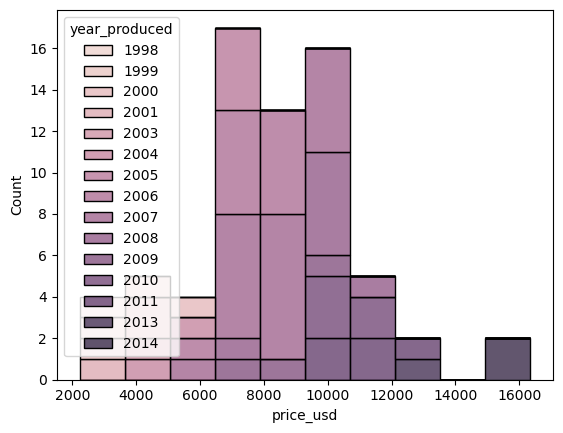

In [20]:
sns.histplot(df_Suzuki,x='price_usd',hue='year_produced',multiple='stack')

Voy a personalizar mas la gráfica con Latex y otros parámetros

In [23]:

import numpy as np
import matplotlib.pyplot as plt

#Configurando Latex
# Configuración de Matplotlib para usar LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

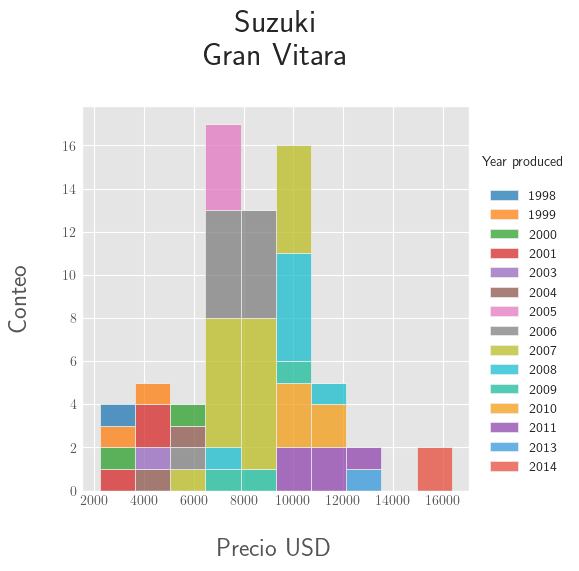

In [30]:
#Definiendo estilos
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(5,5))

sns.histplot(df_Suzuki,x='price_usd',hue='year_produced',multiple='stack',ax=ax,palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#1abc9c", "#f39c12", "#8e44ad", "#3498db", "#e74c3c"]
)
sns.move_legend(ax,'upper left', bbox_to_anchor=(1, 0.9),title='Year produced\n')
plt.title('Suzuki\nGran Vitara\n',fontsize=23)
plt.xlabel('\nPrecio USD',fontsize=18)
plt.ylabel('Conteo\n',fontsize=18)
plt.show()

In [25]:
df_group=df_Suzuki.groupby('year_produced').count()
df_group.sort_values(by='manufacturer_name',ascending=False)

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
year_produced,,,,,,,,,,,,,,,,,,,,,
2007,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
2006,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
2008,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2010,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2011,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2005,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2001,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2009,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1999,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


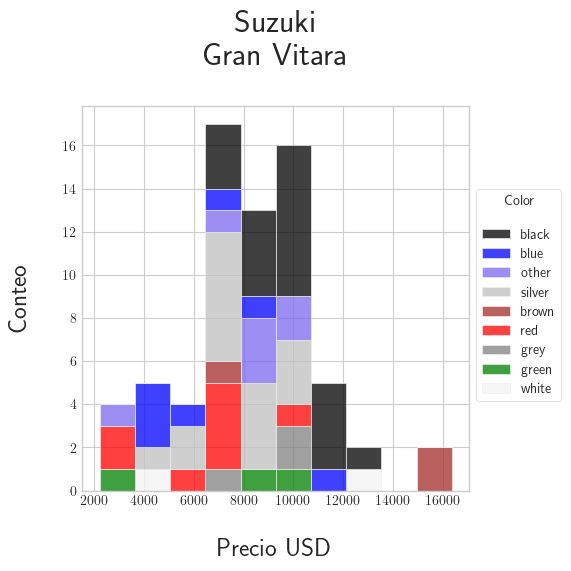

In [33]:
#Definiendo estilos
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(5,5))

sns.histplot(df_Suzuki,x='price_usd',hue='color',multiple='stack',ax=ax,palette=["black", "blue", "#7B68EE", "#C0C0C0", "brown", "red", "#808080", "green", "#F3F3F3"]
)
sns.move_legend(ax,'upper left', bbox_to_anchor=(1, 0.8),title='Color\n',frameon=True)
plt.title('Suzuki\nGran Vitara\n',fontsize=23)
plt.xlabel('\nPrecio USD',fontsize=18)
plt.ylabel('Conteo\n',fontsize=18)
plt.show()

In [34]:
df_color=df_Suzuki.groupby('color').count()
df_color.sort_values(by='manufacturer_name',ascending=False)

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
color,,,,,,,,,,,,,,,,,,,,,
black,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
silver,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
red,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
blue,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
other,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
brown,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
green,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
grey,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
white,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


## Recursos extras
- [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html)
- [Guía definitiva para dominar Pandas](https://platzi.com/blog/pandas/)